<a href="https://colab.research.google.com/github/AbderrhmanAbdellatif/Fake-News-Detection/blob/main/fake_newspaper_detection_with_liwc_dictionary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install liwc

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.patches as patches
from sklearn.metrics import roc_curve,auc
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

import tensorflow as tf
from collections import Counter
from itertools import chain
from collections import Counter
import seaborn as sns
import joblib
from scipy import interp
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
import liwc
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB
import itertools
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")
from gensim.models import Word2Vec
from nltk import ne_chunk, pos_tag, word_tokenize, sent_tokenize

In [63]:
liwcPath = r'/content/LIWC2015 Dictionary.dic'
parses, category_names = liwc.load_token_parser(liwcPath)

# use liwc dictionary to vectorizer text

In [110]:
featuresidx = dict([(f,i) for i,f in enumerate(list(category_names))])
def vectorize(review):
    doc = review.lower().split(' ')
    vector = [0]*(len(list(category_names)))
    for v in list(category for token in tokenize(review) for category in parses(token)):
        vector[featuresidx[v]] = featuresidx[v]/len(doc)
    return vector
def tokenize(text):
    # you may want to use a smarter tokenizer
    for match in re.finditer(r'\w+', text, re.UNICODE):
        yield match.group(0)

In [111]:
review='image copyright getty images on sunday morning donald trump went off on twitter tirade against member of his own party this in itself isn exactly huge news it far from first time president has turned his rhetorical cannons on his own ranks this time however his attacks were particularly biting and personal he essentially called tennessee senator bob corker chair of powerful senate foreign relations committee coward for not running for election he said mr corker begged for president endorsement which he refused give he wrongly claimed that mr corker support of iranian nuclear agreement was his only political accomplishment unlike some of his colleagues mr corker free from having worry about his immediate political future didn hold his tongue skip twitter post by senbobcorker it shame white house has become an adult day care center someone obviously missed their shift this morning senator bob corker senbobcorker october report that wasn end of it though he then spoke with new york times and really let president have it are four choice quotes from tennessee senator interview with times and why they are particularly damning don know why president tweets out things that are not true you know he does it everyone knows he does it but he does you can really sugarcoat this one mr corker is flat out saying president is liar and everyone knows it senator in particular is challenging mr trump insistence that he unsuccessfully pleaded for his endorsement but accusation is much broader mr corker and president used something akin allies tennessean was on mr trump short list for vice president and secretary of state image copyright getty images image caption bob corker at trump campaign rally in july those days are seemingly very much over now and it not like mr corker is going anywhere anytime soon although he not running for election he ll in senate chairing powerful committee until january president margin for success in that chamber is razor thin if democrats can continue stand together in opposition he can afford lose only two votes out of republican senators that why healthcare reform collapsed in july and it could bad news for tax efforts from on out mr corker isn going president any favours look except for few people vast majority of our caucus understands what we dealing with frustration in congress has been growing over what republicans feel has been president inability focus on advancing their agenda getting sharply divided party come together on plans repeal obamacare reform taxes or boost infrastructure spending is challenging enough doing so when president stirs up unrelated controversies on seemingly daily basis makes things all harder one of president gifts has been his ability shake off negative stories by quickly moving on different subject that worked brilliantly during his presidential campaign but it less effective during legislative slow grind image copyright getty images image caption corker at confirmation hearing for secretary of state rex tillerson for months republicans in congress have been grumbling about this in background and among themselves occasionally someone like mr mcconnell will lament that president doesn understand how senate works mr corker has now stated it loud and clear and what more he says almost everyone agrees with him they ve kept silent until now because they still hope pass conservative legislation that president can sign or fear mr trump legions will back primary challenge next year or stay home during general election if that calculus ever changes if it becomes riskier stay silent than speak out mr trump will in real trouble lot of people think that there is some kind of good cop bad cop act underway but that just not true time and again mr trump has appeared undercut secretary of state rex tillerson and others in his administration who are attempting use soft diplomacy deal with range of international crises war against taliban in afghanistan iran compliance with multinational nuclear agreement ongoing dispute between qatar and its persian gulf neighbours unrest in venezuela and most recently north korea continued ballistic missile tests have all been target of president offhand remarks and twitter invective some administration defenders have said this is all part of mr trump strategy an updated version of nixon era madman theory in which president forces adversaries give way because they fear an unpredictable us leader actions mr corker isn buying it there no strategy he says just possibility of chaos which he hopes mr trump senior advisers will able avoid know for fact that every single day at white house it situation of trying contain him there now growing collection of john kelly face palm photos that serve testament chief of staff reported frustration at dealing with president mr trump goes off script praise torch bearing white nationalists at rally in charlottesville and mr kelly is captured closing his eyes and rubbing arch of his nose if attempting stave off migraine image copyright reuters image caption white house chief of staff john kelly looks on us president donald trump speaks at campaign rally president calls north korean leaders criminals in speech united nations and mr kelly straight up buries his face in his hands white house communications team is often left scrambling try explain or reframe an indelicate presidential joke or remark that directly contradicts what was until then official administration line even though mr kelly has brought some discipline west wing staff president still marches beat of his own drum and continues have unfettered access his phone twitter app bob corker is only latest person politician journalist sports star or celebrity feel mercurial president uncontainable ire'.lower()
vectorize(review)

[0.0,
 0.001072961373390558,
 0.002145922746781116,
 0,
 0.004291845493562232,
 0.00536480686695279,
 0.006437768240343348,
 0.0075107296137339056,
 0.008583690987124463,
 0.009656652360515022,
 0.01072961373390558,
 0.011802575107296138,
 0.012875536480686695,
 0.013948497854077254,
 0.015021459227467811,
 0.016094420600858368,
 0.017167381974248927,
 0.018240343347639486,
 0.019313304721030045,
 0.0203862660944206,
 0.02145922746781116,
 0.022532188841201718,
 0.023605150214592276,
 0.02467811158798283,
 0.02575107296137339,
 0.02682403433476395,
 0.027896995708154508,
 0.028969957081545063,
 0,
 0.03111587982832618,
 0,
 0.033261802575107295,
 0.034334763948497854,
 0.03540772532188841,
 0.03648068669527897,
 0.03755364806866953,
 0.03862660944206009,
 0.03969957081545064,
 0.0407725321888412,
 0.04184549356223176,
 0.04291845493562232,
 0.043991416309012876,
 0.045064377682403435,
 0.046137339055793994,
 0.04721030042918455,
 0.048283261802575105,
 0,
 0,
 0.05150214592274678,
 0.0

In [117]:
vectorize(review)

0.0

In [128]:
features = category_names
dataframe = pd.DataFrame([vectorize(review)], columns=features)
dataframe

,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achiev,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler
0,0.0,0.001073,0.002146,0,0.004292,0.005365,0.006438,0.007511,0.008584,0.009657,0.01073,0.011803,0.012876,0.013948,0.015021,0.016094,0.017167,0.01824,0.019313,0.020386,0.021459,0.022532,0.023605,0.024678,0.025751,0.026824,0.027897,0.02897,0,0.031116,0,0.033262,0.034335,0.035408,0.036481,0.037554,0.038627,0.0397,0.040773,0.041845,0.042918,0.043991,0.045064,0.046137,0.04721,0.048283,0,0,0.051502,0.052575,0.053648,0.054721,0.055794,0.056867,0.05794,0.059013,0.060086,0.061159,0.062232,0.063305,0.064378,0.065451,0.066524,0.067597,0.06867,0.069742,0.070815,0.071888,0.072961,0.074034,0,0,0


# read csv 

In [199]:
import pandas as pd
df1=pd.read_csv(r'/content/Fake.csv')
df1['label']=0
df2=pd.read_csv(r'/content/True.csv')
df2['label']=1

# 1 data set
#df3=pd.read_csv(r'/content/test.csv')
#df3['label']=pd.read_csv('/content/final_sub.csv').label.values
#df4=pd.read_csv(r'/content/train.csv')
# 2 dataset 


#df5=pd.read_csv(r'/content/data.csv')
#3 dataset




# processing data

In [200]:
df_fake_ds=pd.concat([df1,df2]).drop(['title','subject','date'],axis=1)

In [201]:
df_fake_ds['label']=df_fake_ds['label'].astype(int)

In [202]:
df_fake_ds

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [ ]:
df_fake_ds1=pd.concat([df3,df4]).drop(['title','author','id'],axis=1)

In [ ]:
df_fake_ds1['label']=df_fake_ds1['label'].astype(int)

In [ ]:
#df_fake_ds1

In [131]:
df_fake_ds2=df5.drop(['URLs','Headline'],axis=1).rename({'Body':'text','Label':'label'},axis=1)

In [132]:
df_fake_ds2

,text,label
0,Image copyright Getty Images\nOn Sunday mornin...,1
1,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,The feud broke into public view last week when...,1
3,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,"Country singer Jason Aldean, who was performin...",1
...,...,...
4004,Trends to Watch\n% of readers think this story...,0
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,NaN,0
4007,SHANGHAI (Reuters) - China said it plans to ac...,1


In [ ]:
fake_news_Df=pd.concat([df_fake_ds,df_fake_ds1,df_fake_ds2])

In [203]:
fake_news_Df=df_fake_ds

In [204]:
fake_news_Df = fake_news_Df[['text','label']].dropna()
fake_news_Df.reset_index(inplace = True)

In [205]:
fake_news_Df.shape

(44898, 3)

In [206]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [207]:
fake_news_Df['text'] = fake_news_Df.text.apply(lambda x : wordopt(x))

In [208]:
fake_news_Df['text']

0        donald trump just couldn t wish all americans ...
1        house intelligence committee chairman devin nu...
2        on friday  it was revealed that former milwauk...
3        on christmas day  donald trump announced that ...
4        pope francis used his annual christmas day mes...
                               ...                        
44893    brussels  reuters    nato allies on tuesday we...
44894    london  reuters    lexisnexis  a provider of l...
44895    minsk  reuters    in the shadow of disused sov...
44896    moscow  reuters    vatican secretary of state ...
44897    jakarta  reuters    indonesia will buy  sukhoi...
Name: text, Length: 44898, dtype: object

In [ ]:
pip install texthero

In [210]:
import texthero as hero
def preprocess_text(s):
    s = hero.fillna(s)
    s = hero.lowercase(s)
    s = hero.remove_digits(s)
    s = hero.remove_punctuation(s)
    s = hero.remove_diacritics(s)
    s = hero.remove_whitespace(s)
    return s

STOPWORDS = ["e", "te", "i", "me", "qe", "ne", "nje", "a", "per", "sh", "nga", "ka", "u", "eshte", "dhe", "shih", "nuk",
             "m", "dicka", "ose", "si", "shume", "etj", "se", "pa", "sipas", "s", "t", "dikujt", "dike", "mire", "vet",
             "bej", "ai", "vend", "prej", "ja", "duke", "tjeter", "kur", "ia", "ku", "ta", "keq", "dy", "ben", "bere",
             "behet", "dickaje", "edhe", "madhe", "la", "sa", "gjate", "zakonisht", "pas", "veta", "mbi", "disa", "iu",
             "mos", "c", "para", "dikush", "gje", "be", "pak", "tek", "fare", "beri", "po", "bie", "k", "do", "gjithe",
             "vete", "mund", "kam", "le", "jo", "beje", "tij", "kane", "ishte", "jane", "vjen", "ate", "kete", "neper",
             "cdo", "na", "marre", "merr", "mori", "rri", "deri", "b", "kishte", "mban", "perpara", "tyre", "marr",
             "gjitha", "as", "vetem", "nen", "here", "tjera", "tjeret", "drejt", "qenet", "ndonje", "nese", "jap",
             "merret", "rreth", "lloj", "dot", "saj", "nder", "ndersa", "cila", "veten", "ma", "ndaj", "mes", "ajo",
             "cilen", "por", "ndermjet", "prapa", "mi", "tere", "jam", "ashtu", "kesaj", "tille", "behem", "cilat",
             "kjo", "menjehere", "ca", "je", "aq", "aty", "prane", "ato", "pasur", "qene", "cilin", "teper", "njera",
             "tej", "krejt", "kush", "bejne", "ti", "bene", "midis", "cili", "ende", "keto", "kemi", "sic", "kryer",
             "cilit", "atij", "gjithnje", "andej", "siper", "sikur", "ketej", "ciles", "ky", "papritur", "ua",
             "kryesisht", "gjithcka", "pasi", "kryhet", "mjaft", "ketij", "perbashket", "ata", "atje", "vazhdimisht",
             "kurre", "tone", "keshtu", "une", "sapo", "rralle", "vetes", "ishin", "afert", "tjetren", "ketu", "cfare",
             "to", "anes", "jemi", "asaj", "secila", "kundrejt", "ketyre", "pse", "tilla", "mua", "nepermjet", "cilet",
             "ndryshe", "kishin", "ju", "tani", "atyre", "dic", "yne", "kudo", "sone", "sepse", "cilave", "kem", "ty",
             "t'i", "nbsp", "tha", "re", "the","jr","t"]

In [211]:
fake_news_Df['text']

0        donald trump just couldn t wish all americans ...
1        house intelligence committee chairman devin nu...
2        on friday  it was revealed that former milwauk...
3        on christmas day  donald trump announced that ...
4        pope francis used his annual christmas day mes...
                               ...                        
44893    brussels  reuters    nato allies on tuesday we...
44894    london  reuters    lexisnexis  a provider of l...
44895    minsk  reuters    in the shadow of disused sov...
44896    moscow  reuters    vatican secretary of state ...
44897    jakarta  reuters    indonesia will buy  sukhoi...
Name: text, Length: 44898, dtype: object

In [ ]:
fake_news_Df['text'] = fake_news_Df['text'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)])
)

In [ ]:
fake_news_Df['text'][0]

### Stopword Removal

In [144]:
eng_stopwords = nltk.corpus.stopwords.words("english")

In [145]:
def remove_eng_stopwords(text):
    token_text = nltk.word_tokenize(text)
    remove_stop = [word for word in token_text if word not in eng_stopwords]
    join_text = ' '.join(remove_stop)
    return join_text

In [146]:
fake_news_Df['text'] = fake_news_Df.text.apply(lambda x : remove_eng_stopwords(x))

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 4))



LookupError: ignored

In [ ]:
fake_news_Df

## Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
lemm = WordNetLemmatizer()
def word_lemmatizer(text):
    token_text = nltk.word_tokenize(text)
    remove_stop = [lemm.lemmatize(w) for w in token_text]
    join_text = ' '.join(remove_stop)
    return join_text

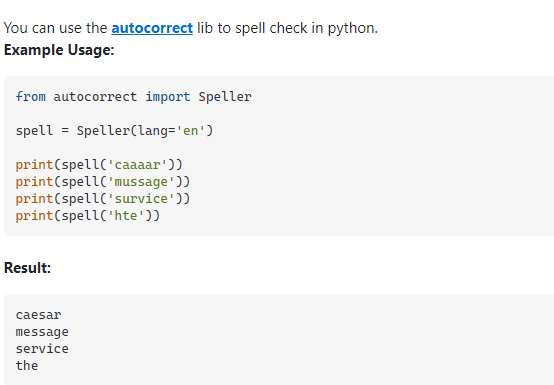

In [147]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
fake_news_Df['text'] = fake_news_Df['text'].apply(punctuation_removal)

In [148]:
fake_news_Df['text']

0       image copyright getty images on sunday morning...
1       london reuters last flag flying comedy drama a...
2       feud broke into public view last week when mr ...
3       mexico city reuters egypt cheiron holdings lim...
4       country singer jason aldean who was performing...
                              ...                        
3983    vietnam is in great danger you must publish an...
3984    trends watch of readers think this story is fa...
3985    trump is soon give minute speech for of reader...
3986    shanghai reuters china said it plans accept da...
3987    vice president mike pence leaves nfl game beca...
Name: text, Length: 3988, dtype: object

In [ ]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [149]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

In [150]:
fake_news_Df['text'] = fake_news_Df.text.apply(lambda x : denoise_text(x))

NameError: ignored

In [151]:
fake_news_Df['text']

0       image copyright getty images on sunday morning...
1       london reuters last flag flying comedy drama a...
2       feud broke into public view last week when mr ...
3       mexico city reuters egypt cheiron holdings lim...
4       country singer jason aldean who was performing...
                              ...                        
3983    vietnam is in great danger you must publish an...
3984    trends watch of readers think this story is fa...
3985    trump is soon give minute speech for of reader...
3986    shanghai reuters china said it plans accept da...
3987    vice president mike pence leaves nfl game beca...
Name: text, Length: 3988, dtype: object

In [ ]:
fake_news_Df['text']=fake_news_Df['text'].astype(str)

#Corpus

In [153]:
featuresidx = dict([(f,i) for i,f in enumerate(list(category_names))])
def vectorize(review):
    doc = review.lower().split(' ')
    vector = [0]*(len(list(category_names)))
    for v in list(category for token in tokenize(review) for category in parses(token)):
        vector[featuresidx[v]] = featuresidx[v]/len(doc)
    return vector
def tokenize(text):
    # you may want to use a smarter tokenizer
    for match in re.finditer(r'\w+', text, re.UNICODE):
        yield match.group(0)

In [155]:
corpus = []
words = []
for i in range(0,len(fake_news_Df)):
    review = re.sub('[^a-zA-Z0-9]',' ',fake_news_Df['text'][i])
    review = review.lower()
    review = vectorize(review)
    corpus.append(review)
    

In [157]:
features = category_names
dataframe = pd.DataFrame(corpus, columns=features)
dataframe

,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achiev,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler
0,0.0,0.001073,0.002146,0.0,0.004292,0.005365,0.006438,0.007511,0.008584,0.009657,0.010730,0.011803,0.012876,0.013948,0.015021,0.016094,0.017167,0.018240,0.019313,0.020386,0.021459,0.022532,0.023605,0.024678,0.025751,0.026824,0.027897,0.028970,0.000000,0.031116,0.000000,0.033262,0.034335,0.035408,0.036481,0.037554,0.038627,0.039700,0.040773,0.041845,0.042918,0.043991,0.045064,0.046137,0.047210,0.048283,0.000000,0.000000,0.051502,0.052575,0.053648,0.054721,0.055794,0.056867,0.057940,0.059013,0.060086,0.061159,0.062232,0.063305,0.064378,0.065451,0.066524,0.067597,0.068670,0.069742,0.070815,0.071888,0.072961,0.074034,0.000000,0.000000,0.0
1,0.0,0.002070,0.004141,0.0,0.008282,0.000000,0.012422,0.014493,0.016563,0.018634,0.020704,0.022774,0.024845,0.026915,0.028986,0.031056,0.033126,0.035197,0.037267,0.039337,0.041408,0.043478,0.045549,0.047619,0.049689,0.051760,0.053830,0.055901,0.057971,0.000000,0.000000,0.064182,0.066253,0.068323,0.070393,0.072464,0.074534,0.076605,0.078675,0.080745,0.082816,0.084886,0.086957,0.089027,0.091097,0.093168,0.095238,0.097308,0.099379,0.101449,0.103520,0.105590,0.107660,0.109731,0.111801,0.113872,0.115942,0.118012,0.120083,0.122153,0.124224,0.126294,0.128364,0.130435,0.132505,0.134576,0.136646,0.138716,0.000000,0.142857,0.000000,0.000000,0.0
2,0.0,0.001053,0.002105,0.0,0.004211,0.005263,0.006316,0.007368,0.008421,0.009474,0.010526,0.011579,0.012632,0.013684,0.014737,0.015789,0.016842,0.017895,0.018947,0.020000,0.021053,0.022105,0.023158,0.024211,0.025263,0.026316,0.027368,0.028421,0.000000,0.030526,0.031579,0.032632,0.033684,0.034737,0.035789,0.036842,0.037895,0.038947,0.040000,0.041053,0.042105,0.043158,0.044211,0.045263,0.046316,0.047368,0.000000,0.049474,0.050526,0.051579,0.052632,0.053684,0.054737,0.055789,0.056842,0.057895,0.058947,0.060000,0.061053,0.062105,0.063158,0.064211,0.065263,0.066316,0.067368,0.000000,0.069474,0.070526,0.000000,0.072632,0.073684,0.074737,0.0
3,0.0,0.011494,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.091954,0.103448,0.114943,0.126437,0.137931,0.149425,0.000000,0.172414,0.183908,0.195402,0.000000,0.218391,0.000000,0.241379,0.252874,0.000000,0.000000,0.000000,0.000000,0.310345,0.000000,0.333333,0.000000,0.000000,0.367816,0.379310,0.390805,0.000000,0.413793,0.425287,0.000000,0.448276,0.459770,0.471264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.551724,0.563218,0.574713,0.586207,0.597701,0.000000,0.620690,0.632184,0.000000,0.655172,0.000000,0.678161,0.689655,0.701149,0.000000,0.000000,0.735632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.0,0.033333,0.066667,0.0,0.000000,0.000000,0.000000,0.233333,0.266667,0.000000,0.333333,0.366667,0.400000,0.433333,0.000000,0.500000,0.533333,0.000000,0.600000,0.000000,0.000000,0.700000,0.733333,0.766667,0.000000,0.833333,0.000000,0.900000,0.933333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.300000,0.000000,1.366667,1.400000,1.433333,0.000000,1.500000,0.000000,0.000000,1.600000,1.633333,1.666667,1.700000,1.733333,0.000000,1.800000,1.833333,0.000000,1.900000,0.000000,1.966667,2.000000,2.033333,2.066667,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

# use other way

In [ ]:
corpus = []
words = []

for i in range(0,len(fake_news_Df)):
    review = re.sub('[^a-zA-Z0-9]',' ',fake_news_Df['text'][i])
    review = review.lower()
    review = review.split() 
    review = list(category for token in review for category in parses(token))
    statements = ' '.join(review)
    corpus.append(statements)
    words.append(review)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=5000)
X_fit=vectorizer.fit(corpus)

In [ ]:
X_transformed=X_fit.transform(corpus)

In [ ]:
features = vectorizer.get_feature_names()
df_count = pd.DataFrame(X_transformed.toarray(),columns = features)
df_count

,achiev,adj,adverb,affect,affiliation,anger,anx,article,assent,auxverb,bio,body,cause,certain,cogproc,compare,conj,death,differ,discrep,drives,family,feel,female,filler,focusfuture,focuspast,focuspresent,friend,function,health,hear,home,informal,ingest,insight,interrog,ipron,leisure,male,money,motion,negate,negemo,netspeak,nonflu,number,percept,posemo,power,ppron,prep,pronoun,quant,relativ,relig,reward,risk,sad,see,sexual,shehe,social,space,swear,tentat,they,time,verb,we,work,you
0,0.014927,0.176296,0.100020,0.207260,0.058436,0.097785,0.000000,0.000000,0.000000,0.100754,0.021951,0.000000,0.044400,0.047804,0.182102,0.049035,0.088392,0.000000,0.024603,0.058316,0.158483,0.000000,0.000000,0.000000,0.0,0.042748,0.065503,0.137099,0.016925,0.594166,0.013812,0.015348,0.000000,0.061828,0.000000,0.029482,0.040678,0.074351,0.010839,0.071963,0.000000,0.029194,0.010978,0.112909,0.019096,0.000000,0.016038,0.032639,0.105337,0.064526,0.128196,0.136016,0.195972,0.044203,0.348528,0.008052,0.026323,0.011309,0.007048,0.021303,0.011499,0.065169,0.240389,0.077419,0.013242,0.004980,0.011744,0.252416,0.230552,0.012786,0.032548,0.064238
1,0.049711,0.100426,0.071376,0.069022,0.040542,0.019156,0.011353,0.000000,0.000000,0.122012,0.082241,0.000000,0.008214,0.008844,0.128869,0.073484,0.108450,0.000000,0.032774,0.000000,0.218654,0.000000,0.000000,0.000000,0.0,0.026692,0.132441,0.068485,0.000000,0.644577,0.000000,0.008519,0.022723,0.011439,0.134533,0.057273,0.042334,0.085114,0.117315,0.101391,0.028799,0.024305,0.018280,0.049045,0.000000,0.000000,0.026706,0.054347,0.023918,0.168838,0.063247,0.249130,0.144185,0.032712,0.316547,0.000000,0.017532,0.018831,0.000000,0.053207,0.000000,0.054257,0.203914,0.136494,0.022049,0.041458,0.009778,0.152837,0.195711,0.010645,0.147102,0.000000
2,0.029695,0.090974,0.064971,0.098168,0.049820,0.029424,0.000000,0.005290,0.000000,0.097613,0.084218,0.054944,0.029442,0.018114,0.143610,0.050167,0.071394,0.014728,0.037757,0.013560,0.169862,0.000000,0.036422,0.006758,0.0,0.013667,0.075790,0.116886,0.028859,0.667746,0.000000,0.008723,0.005817,0.087854,0.068883,0.050271,0.030346,0.091122,0.036965,0.047195,0.004915,0.012445,0.023399,0.062780,0.097686,0.000000,0.004558,0.123233,0.036739,0.074660,0.145727,0.224195,0.229248,0.012562,0.262412,0.000000,0.035907,0.014463,0.006009,0.090810,0.009804,0.027780,0.259085,0.097066,0.033869,0.033963,0.075096,0.156510,0.200415,0.010901,0.031713,0.088997
3,0.021241,0.064367,0.086414,0.058986,0.062365,0.000000,0.007277,0.006622,0.000000,0.136855,0.011714,0.000000,0.031590,0.056687,0.238076,0.026166,0.084406,0.000000,0.089276,0.039606,0.125647,0.000000,0.000000,0.000000,0.0,0.011406,0.079894,0.156072,0.000000,0.672552,0.007371,0.005460,0.000000,0.065986,0.000000,0.041953,0.037987,0.119026,0.104113,0.041355,0.018458,0.041543,0.035149,0.031435,0.091712,0.000000,0.017117,0.084596,0.030660,0.034432,0.070942,0.203228,0.184830,0.047175,0.318826,0.008594,0.011237,0.018104,0.000000,0.090940,0.000000,0.040571,0.159741,0.111786,0.014132,0.021258,0.012534,0.176328,0.246055,0.013646,0.044661,0.017139
4,0.009408,0.048246,0.054033,0.095793,0.073658,0.010876,0.019338,0.017599,0.000000,0.103910,0.031129,0.027078,0.041974,0.015064,0.146332,0.013907,0.087962,0.008166,0.041867,0.010024,0.145546,0.008655,0.013462,0.000000,0.0,0.035361,0.084041,0.129610,0.008000,0.702139,0.006529,0.024182,0.032253,0.006495,0.008487,0.037163,0.038456,0.083469,0.025618,0.031399,0.000000,0.059798,0.041514,0.041768,0.000000,0.009677,0.015162,0.057304,0.058845,0.056644,0.116705,0.248601,0.193884,0.023216,0.290978,0.114185,0.004977,0.010691,0.006663,0.030209,0.000000,0.030805,0.248698,0.163601,0.000000,0.028245,0.061066,0.078097,0.217959,0.054396,0.017583,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

# use classifier 

In [158]:
x=dataframe.values

In [159]:
y=fake_news_Df['label']

In [160]:
x

array([[0.        , 0.00107296, 0.00214592, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00207039, 0.00414079, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00105263, 0.00210526, ..., 0.07368421, 0.07473684,
        0.        ],
       ...,
       [0.        , 0.01754386, 0.03508772, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00353357, 0.00706714, ..., 0.        , 0.25088339,
        0.        ],
       [0.        , 0.00190476, 0.00380952, ..., 0.        , 0.1352381 ,
        0.        ]])

In [161]:
counter = Counter(y)
print(counter)

Counter({0: 2120, 1: 1868})


In [165]:
oversample = SMOTE(random_state = 101)
x, y = oversample.fit_resample(x, y)

In [166]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [167]:
X_test

array([[0.        , 0.04166667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04166667, 0.08333333, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01388889, 0.02777778, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00291545, 0.0058309 , ..., 0.20408163, 0.20699708,
        0.        ],
       [0.        , 0.04166667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00240964, 0.00481928, ..., 0.        , 0.        ,
        0.        ]])

In [168]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import LinearSVC
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    #models['cart'] = DecisionTreeClassifier(criterion='entropy',random_state=150,splitter='random')
    models['svm'] = LinearSVC(random_state=0, tol=1e-5)
    models['NN']=MLPClassifier()
    #models['RF']=RandomForestClassifier(criterion='gini')
    return models
def get_models2():
    models = dict()
    models['RF']=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,n_jobs=None, oob_score=False, random_state=None,verbose=0)
    
    clf1 =LogisticRegression(C=86.56900442587761, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0)
    clf2 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,verbose=0)
    clf3 = KNeighborsClassifier(leaf_size=23, n_neighbors=10, p=1)
    clf4= LinearSVC()
    clf5=DecisionTreeClassifier(criterion='entropy',random_state=150,splitter='random')
    models['VC1']=VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('knn', clf3)], weights=[2,1,1],flatten_transform=True)
    models['VC2']=VotingClassifier(estimators=[('lr', clf1), ('svm', clf4), ('cart', clf5)], weights=[2,1,1],flatten_transform=True)
    models['BG']=BaggingClassifier(base_estimator=clf5,n_estimators=10, random_state=0)
    models['BG1']=BaggingClassifier(base_estimator=clf5,n_estimators=10, random_state=0)
    models['Ada']=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,n_estimators=100, random_state=None)
    models['XGB']=XGBClassifier()
    return models





In [169]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

def eval_confusion(y_pred, y_true):
    conf_matrix = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return {'matrix': conf_matrix, 'precision': precision, 'recall': recall, 'f1': f1}

In [170]:
# evaluate each model on the training set
for clf_name, clf in get_models().items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf = eval_confusion(y_pred, y_test)
    print("{}:".format(clf_name))
    print(conf['matrix'])
    print("precision: {}".format(conf['precision']))
    print("recall: {}".format(conf['recall']))
    print("f1-score: {}".format(conf['f1']))
    print("accuracy: {}".format(accuracy_score(y_pred, y_test)))
    print()

lr:
[[374 287]
 [ 35 576]]
precision: 0.6674391657010429
recall: 0.9427168576104746
f1-score: 0.7815468113975577
accuracy: 0.7468553459119497

knn:
[[485 176]
 [114 497]]
precision: 0.7384843982169391
recall: 0.8134206219312602
f1-score: 0.7741433021806854
accuracy: 0.7720125786163522

svm:
[[394 267]
 [ 37 574]]
precision: 0.6825208085612366
recall: 0.939443535188216
f1-score: 0.790633608815427
accuracy: 0.7610062893081762

NN:
[[518 143]
 [ 97 514]]
precision: 0.7823439878234398
recall: 0.8412438625204582
f1-score: 0.8107255520504733
accuracy: 0.8113207547169812



In [ ]:
from sklearn.model_selection import GridSearchCV

# fine-tune MLP classifier
mlp_best = MLPClassifier()
mlp_param_grid = {
    'hidden_layer_sizes': [(16,), (16, 16), (32,),(32,32),(64,32,16)],
    'activation': ['relu', 'tanh', 'logistic']
}

MLPClassifier_randomized_search = RandomizedSearchCV(mlp_best, mlp_param_grid, n_iter=5, scoring='f1',
                                           cv=5, verbose=2, random_state=42)
MLPClassifier_randomized_search.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats

logistic_best = LogisticRegression()
logistic_param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': scipy.stats.reciprocal(20, 1000),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

logistic_randomized_search = RandomizedSearchCV(logistic_best, logistic_param_dist, n_iter=5, scoring='f1',cv=5, verbose=2, random_state=42)
logistic_randomized_search.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats

# fine-tune SVM classifier
SVC_best = LinearSVC()
param_grid = {'penalty':['l1', 'l2'],'C':[1, 10]}
svm_randomized_search = RandomizedSearchCV(SVC_best, param_grid)
svm_randomized_search.fit(X_train, y_train)

In [ ]:
#List Hyperparameters that we want to tune.

random_param_dist = {
    'leaf_size': list(range(1,50)),
    'n_neighbors': list(range(1,30)),
    'p':[1,2],
}

knn_best = KNeighborsClassifier()
knn_randomized_search = RandomizedSearchCV(knn_best, random_param_dist, n_iter=5, scoring='f1',
                                           cv=5, verbose=2, random_state=42)
knn_randomized_search.fit(X_train, y_train)

In [189]:
import joblib
import os
def save_model(model, filename):
    # create directory if it doesn't exist
    if not os.path.isdir(MODELS_DIR):
        os.makedirs(MODELS_DIR)
        
    path = os.path.join(MODELS_DIR, filename)
    joblib.dump(model, path)

In [190]:
# get the best estimators
mlp_best = MLPClassifier_randomized_search.best_estimator_
logistic_best = logistic_randomized_search.best_estimator_
SVC_best = svm_randomized_search.best_estimator_
knn_best =  knn_randomized_search.best_params_
MODELS_DIR = 'models'
# save each model
save_model(mlp_best, 'mlp_best.pkl')
save_model(logistic_best, 'adaboost_best.pkl')
save_model(SVC_best, 'logistic_best.pkl')
save_model(knn_best, 'random_best.pkl')

In [194]:
MLPClassifier_randomized_search.best_estimator_

MLPClassifier(hidden_layer_sizes=(16,))

In [195]:
logistic_randomized_search.best_estimator_

LogisticRegression(C=86.56900442587761, penalty='l1', solver='liblinear')

In [196]:
svm_randomized_search.best_estimator_

LinearSVC(C=10)

In [197]:
knn_randomized_search.best_estimator_

KNeighborsClassifier(leaf_size=15, n_neighbors=25, p=1)

In [198]:
# evaluate each model on the training set
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression(C=86.56900442587761, penalty='l1', solver='liblinear')
    models['knn'] = KNeighborsClassifier(leaf_size=15, n_neighbors=25, p=1)
    models['svm'] = LinearSVC(C=10)
    models['NN']=MLPClassifier(hidden_layer_sizes=(16,))
    return models
for clf_name, clf in get_models().items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf = eval_confusion(y_pred, y_test)
    print("{}:".format(clf_name))
    print(conf['matrix'])
    print("precision: {}".format(conf['precision']))
    print("recall: {}".format(conf['recall']))
    print("f1-score: {}".format(conf['f1']))
    print("accuracy: {}".format(accuracy_score(y_pred, y_test)))
    print()

lr:
[[431 230]
 [ 58 553]]
precision: 0.7062579821200511
recall: 0.9050736497545008
f1-score: 0.7934002869440459
accuracy: 0.7735849056603774

knn:
[[418 243]
 [101 510]]
precision: 0.6772908366533864
recall: 0.8346972176759411
f1-score: 0.7478005865102639
accuracy: 0.7295597484276729

svm:
[[414 247]
 [ 50 561]]
precision: 0.6943069306930693
recall: 0.9181669394435352
f1-score: 0.7906976744186045
accuracy: 0.7665094339622641

NN:
[[470 191]
 [ 79 532]]
precision: 0.73582295988935
recall: 0.8707037643207856
f1-score: 0.7976011994002998
accuracy: 0.7877358490566038



# Unsupervised - K Means Clustering Fake News 



In [ ]:
#https://www.kaggle.com/klmsathishkumar/validate-the-news-here-lstm-90-accuracy
#https://www.kaggle.com/snanilim/100-accuracy-is-this-title-fake-or-real/notebook#N-Gram-Analysis
#https://www.kaggle.com/atishadhikari/fake-news-cleaning-word2vec-lstm-99-accuracy